In [2]:
import pandas as pd
import numpy as np

df=pd.read_csv('titanic_cleaned.csv')

y=df['Survived']

x=df.drop(['Survived','Name','Ticket','PassengerId'],axis=1)
x.head()
x = pd.get_dummies(x)
x.shape
x.head()



,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,FarePerPerson,Sex_female,Sex_male,Embarked_28.0,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,2,0,3.62500,False,True,False,False,False,True
1,1,38.0,1,0,71.2833,2,0,35.64165,True,False,False,True,False,False
2,3,26.0,0,0,7.9250,1,1,7.92500,True,False,False,False,False,True
3,1,35.0,1,0,53.1000,2,0,26.55000,True,False,False,False,False,True
4,3,35.0,0,0,8.0500,1,1,8.05000,False,True,False,False,False,True


In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test  = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape



(712, 14)

In [4]:
from sklearn.linear_model import LogisticRegression
clf_log=LogisticRegression(max_iter=1000)
clf_log.fit(x_train,y_train)
clf_log.predict(x_test)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [5]:
from sklearn.ensemble import RandomForestClassifier

clf_rfc=RandomForestClassifier()
clf_rfc.fit(x_train,y_train)
clf_rfc.predict(x_test)

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1])

In [6]:
from sklearn.metrics import f1_score
print(f1_score(y_test,clf_log.predict(x_test),average=None))
print(f1_score(y_test,clf_rfc.predict(x_test),average=None))

[0.82790698 0.74125874]
[0.84057971 0.78145695]


In [7]:
print(clf_log.score(x_test,y_test))
print(clf_rfc.score(x_test,y_test))

0.7932960893854749
0.8156424581005587


In [8]:
from sklearn.metrics import confusion_matrix

cm1=confusion_matrix(y_test,clf_log.predict(x_test))
print(cm1)

cm2=confusion_matrix(y_test,clf_rfc.predict(x_test))
print(cm2)

[[89 16]
 [21 53]]
[[87 18]
 [15 59]]


In [9]:
from sklearn.naive_bayes import GaussianNB

clf_nb=GaussianNB()
clf_nb.fit(x_train,y_train)
clf_nb.predict(x_test)

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0])

In [10]:
F1scoreLOG=f1_score(y_test,clf_log.predict(x_test),average=None)
F1scoreRFC=f1_score(y_test,clf_rfc.predict(x_test),average=None)
F1scoreNB= f1_score(y_test,clf_nb.predict(x_test),average=None)
AccuracyNB=clf_nb.score(x_test,y_test)
AccuracyLOG=clf_log.score(x_test,y_test)
AccuracyRFC=clf_rfc.score(x_test,y_test)

result_df=pd.DataFrame({
    'Model':['LogisticRegression','RandomForestClassifier','NaiveBayes'],
    'Accuracy':[AccuracyLOG,AccuracyRFC,AccuracyNB],
    'F1Score':[F1scoreLOG,F1scoreRFC,F1scoreNB] 
})

print(result_df.sort_values(by='Accuracy',ascending=False))



                    Model  Accuracy                                    F1Score
1  RandomForestClassifier  0.815642   [0.8405797101449275, 0.7814569536423841]
0      LogisticRegression  0.793296    [0.827906976744186, 0.7412587412587412]
2              NaiveBayes  0.698324  [0.7857142857142857, 0.49056603773584906]


In [11]:
import pickle

with open ('Titanic_RFC.pkl','wb') as f:
    pickle.dump(clf_rfc,f)

In [12]:
with open ('Titanic_RFC.pkl', 'rb') as f:
    loaded_clf_rfc=pickle.load(f)

loaded_clf_rfc.predict(x_test)

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1])

In [13]:
x_train_reduced = x_train.drop(['Age', 'Fare'], axis=1)
x_test_reduced = x_test.drop(['Age', 'Fare'], axis=1)

In [14]:
clf_rfc_reduced=RandomForestClassifier()
clf_rfc_reduced.fit(x_train_reduced,y_train)
clf_rfc_reduced.predict(x_test_reduced)

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0])

In [15]:
F1scoreRFC_Reduced=f1_score(y_test,clf_rfc_reduced.predict(x_test_reduced),average=None)
AccuracyRFC_Reduced=clf_rfc_reduced.score(x_test_reduced,y_test)
print(F1scoreRFC_Reduced)
print(F1scoreRFC)
print(AccuracyRFC_Reduced)
print(AccuracyRFC)


[0.83018868 0.75342466]
[0.84057971 0.78145695]
0.7988826815642458
0.8156424581005587


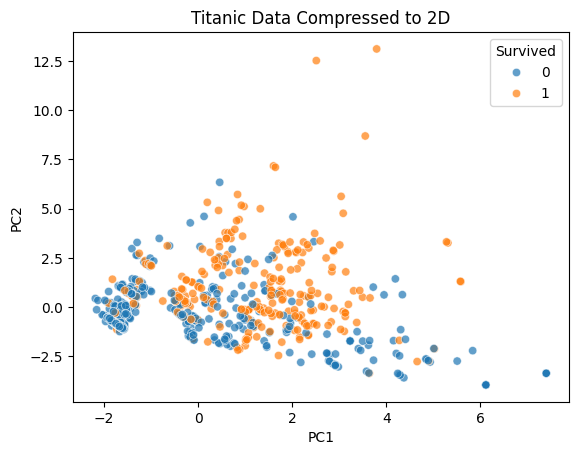

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x) 

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Survived'] = y.values

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Survived', alpha=0.7)
plt.title("Titanic Data Compressed to 2D")
plt.show()

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf'], 
    'gamma': ['scale', 'auto'] 
}


grid = GridSearchCV(SVC(max_iter=1000), param_grid, refit=True, verbose=2, cv=5, n_jobs=-1)

grid.fit(x_train, y_train) 

print(f"Best Parameters: {grid.best_params_}")
print(f"Best Score: {grid.best_score_:.4f}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Score: 0.7009


c:\Users\Sonar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:313: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
